### Import the relevant libraries

In [51]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
sns.set()

### Data

In [52]:
dig = load_iris()
train_inputs, test_inputs, train_targets, test_targets = train_test_split(dig.data, dig.target, 
                                                    test_size = 0.2, random_state=42)

train_inputs, validation_inputs, train_targets, validation_targets = train_test_split(train_inputs, train_targets, 
                                                    test_size = 0.15, random_state=42)

print(f'Train inputs shape: {train_inputs.shape}\n\
Train targets shape: {train_targets.shape[0]}\n\
Test inputs shape: {test_inputs.shape}\n\
Test targets shape: {test_targets.shape[0]}\n\
Validation inputs shape: {validation_inputs.shape}\n\
Validation targets shape: {validation_targets.shape[0]}')

Train inputs shape: (102, 4)
Train targets shape: 102
Test inputs shape: (30, 4)
Test targets shape: 30
Validation inputs shape: (18, 4)
Validation targets shape: 18


In [57]:
pd.Series(test_targets).to_clipboard(index=False)

In [3]:
dig['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [3]:
columns = [name[:-5] for name in dig.feature_names]
columns

['sepal length', 'sepal width', 'petal length', 'petal width']

In [4]:
iris = pd.DataFrame(train_inputs, columns=columns)
iris

,sepal length,sepal width,petal length,petal width
0,5.7,2.6,3.5,1.0
1,4.9,3.0,1.4,0.2
2,5.5,2.5,4.0,1.3
3,5.4,3.0,4.5,1.5
4,4.8,3.4,1.9,0.2
...,...,...,...,...
97,7.4,2.8,6.1,1.9
98,5.4,3.7,1.5,0.2
99,6.6,2.9,4.6,1.3
100,5.0,3.3,1.4,0.2


In [5]:
iris.isnull().values.any()

False

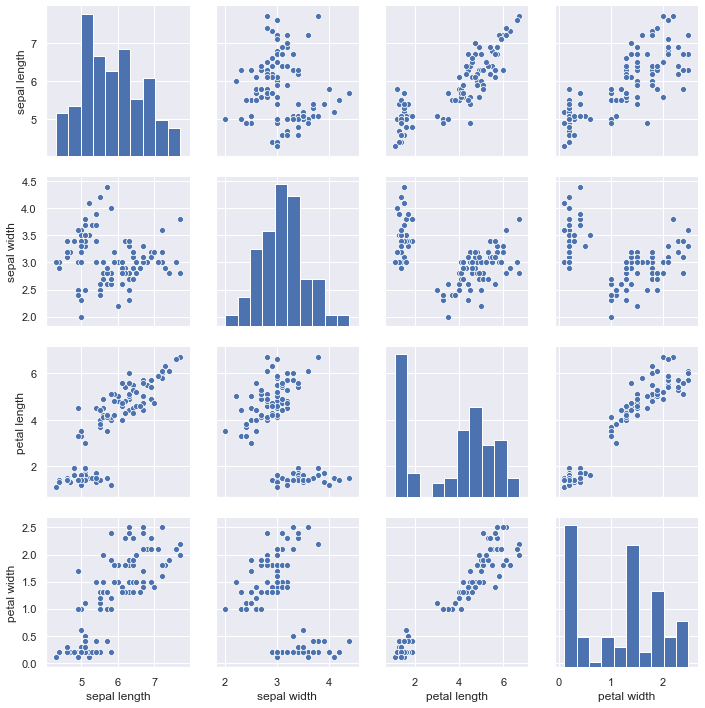

In [7]:
sns.pairplot(iris)

### Model
Outline, optimizers, loss, early stopping and training

In [29]:
# Set the input and output sizes
input_size = train_inputs.shape[1]
output_size = 3
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 16
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'), # 1st hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 10

# set a maximum number of training epochs
max_epochs = 200

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Train on 102 samples, validate on 18 samples
Epoch 1/200
102/102 - 0s - loss: 1.5787 - accuracy: 0.3235 - val_loss: 1.2980 - val_accuracy: 0.4444
Epoch 2/200
102/102 - 0s - loss: 1.4355 - accuracy: 0.3235 - val_loss: 1.2208 - val_accuracy: 0.4444
Epoch 3/200
102/102 - 0s - loss: 1.3170 - accuracy: 0.3235 - val_loss: 1.1647 - val_accuracy: 0.4444
Epoch 4/200
102/102 - 0s - loss: 1.2409 - accuracy: 0.3235 - val_loss: 1.1241 - val_accuracy: 0.4444
Epoch 5/200
102/102 - 0s - loss: 1.1697 - accuracy: 0.3235 - val_loss: 1.0937 - val_accuracy: 0.4444
Epoch 6/200
102/102 - 0s - loss: 1.1210 - accuracy: 0.3235 - val_loss: 1.0748 - val_accuracy: 0.4444
Epoch 7/200
102/102 - 0s - loss: 1.0840 - accuracy: 0.3137 - val_loss: 1.0661 - val_accuracy: 0.2222
Epoch 8/200
102/102 - 0s - loss: 1.0654 - accuracy: 0.0392 - val_loss: 1.0599 - val_accuracy: 0.1667
Epoch 9/200
102/102 - 0s - loss: 1.0438 - accuracy: 0.3333 - val_loss: 1.0503 - val_accuracy: 0.4444
Epoch 10/200
102/102 - 0s - loss: 1.0292 - acc

### Evaluating model

In [30]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

30/30 [==============================] - 0s 67us/sample - loss: 0.3596 - accuracy: 0.9667


In [31]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.36. Test accuracy: 96.67%


In [216]:
model.save('iris_nn.h5')

In [249]:
for layer in model.layers:
    print(layer.get_weights())

[array([[ 0.20213988, -0.34004766,  0.3376199 , -0.3882282 ],
       [ 0.8560197 , -0.42861333,  0.59015435, -0.769332  ],
       [-1.2987196 ,  1.3541142 , -0.59934705,  0.12842987],
       [-0.86695695, -0.14911127, -1.2194976 , -0.03023172]],
      dtype=float32), array([ 0.7494692 , -0.04173908,  0.1949014 , -0.2668786 ], dtype=float32)]
[array([[ 1.8096459 , -1.657313  , -2.580729  ],
       [-1.2568648 ,  0.62697315,  0.6280899 ],
       [ 1.0879838 ,  0.5964791 , -0.57228243],
       [ 0.53407407, -0.5479286 , -0.26714033]], dtype=float32), array([-0.5516936 ,  0.04402858,  0.4595358 ], dtype=float32)]


In [32]:
import tensorflow as tf 
model = tf.keras.models.load_model('iris_nn.h5')

In [36]:
layers = model.layers
hidden_layer_weigths = pd.DataFrame(layers[0].get_weights()[0])
hidden_layer_weigths.to_clipboard()

In [37]:
layers = model.layers
hidden_layer_biases = pd.DataFrame(layers[0].get_weights()[1])
hidden_layer_biases.to_clipboard()

In [38]:
layers = model.layers
output_layer_weigths = pd.DataFrame(layers[1].get_weights()[0])
output_layer_weigths.to_clipboard()

In [39]:
layers = model.layers
output_layer_biases = pd.DataFrame(layers[1].get_weights()[1])
output_layer_biases.to_clipboard()

In [40]:
test = pd.DataFrame(test_inputs, columns=columns)
print(test)
test.to_clipboard(excel=True)

    sepal length  sepal width  petal length  petal width
0            6.1          2.8           4.7          1.2
1            5.7          3.8           1.7          0.3
2            7.7          2.6           6.9          2.3
3            6.0          2.9           4.5          1.5
4            6.8          2.8           4.8          1.4
5            5.4          3.4           1.5          0.4
6            5.6          2.9           3.6          1.3
7            6.9          3.1           5.1          2.3
8            6.2          2.2           4.5          1.5
9            5.8          2.7           3.9          1.2
10           6.5          3.2           5.1          2.0
11           4.8          3.0           1.4          0.1
12           5.5          3.5           1.3          0.2
13           4.9          3.1           1.5          0.1
14           5.1          3.8           1.5          0.3
15           6.3          3.3           4.7          1.6
16           6.5          3.0  

In [33]:
pd.DataFrame(model.predict(test_inputs)).to_clipboard()